0.0003770558183610374


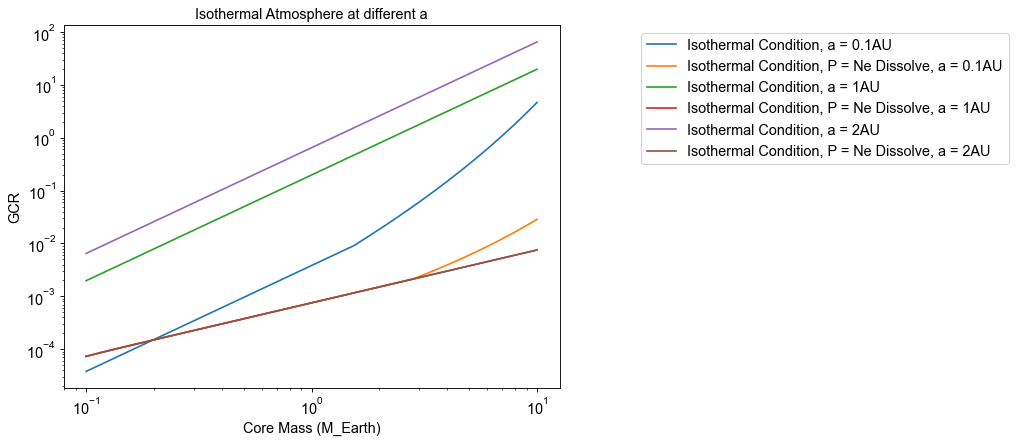

In [24]:
from scipy import integrate
import scipy.integrate as integrate
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

SMALL_SIZE = 13
matplotlib.rc('font',size = SMALL_SIZE, family = 'Arial')
matplotlib.rc('axes',titlesize = SMALL_SIZE)

hfont = {'fontname':'Helvetica'}

M_Earth = 5.972e+27
mu = 2.34
m_p = 1.67*10**(-24) #[g]
k_B = 1.38*10**(-16)#[erg/K]
G = 6.67408 * 10**(-8) #[dyne cm^2/g^2]
M_mars = 0.64171*10**(27) #[g]
M_sun = 1.989*10**(33) #[g]
M_earth = 5.98*10**27 #[g]
R_E = 6.378*10**8 #[cm]
autocm = 1.496*10**(13)
Ne_reserve = 64.5e15
S_Ne = 2.7e-12
x_Ne = 2.1e-5

T_0 = 1000

#define temperature
def T_disk(a):
    return T_0*(a/0.1)**(-3/7) #[K]

def Cs_disk(T):
    return np.sqrt(k_B*T/mu/m_p) #CHECK UNITS [cm/s]

def M_int(x, a, M, P_bot,T): 
    #print(Cs_disk(T))
    #compute the R_out based on Boundy/Hill Radisu
    R_H = a*(M/3/M_sun)**(1/3)*autocm #cm
    R_B = G*M/Cs_disk(T)**2 #cm
    

    R_out = [0]
    R_out = min(R_H,R_B)
    R_out_E = R_out/R_E
    
    A = G*M/Cs_disk(T)**2 #CHECK UNITS [cm]

    #P_bot = 10**6#Ne_reserve/S_Ne/x_Ne/M
    R_bot = R_E*M**0.25
    exp = np.exp(-A/R_out + A/R_bot)
    rho_bot = P_bot/Cs_disk(T)**2 #[g/cm^3]
    rho_ne = rho_bot/exp
    
    return 4*np.pi*rho_ne*(x**2*np.exp(A/R_bot - A/x))

M_array = np.linspace(1e-1, 10,5000)
M_P_Constant = [0]*len(M_array)
M_P_Ne_limit = [0]*len(M_array)
M_P_10bar = [0]*len(M_array)
M_P_5bar = [0]*len(M_array)

def r_max(M, T):
    return G*M*M_Earth/Cs_disk(T)**2

def GCR_cal(M, T):
    r_min = R_E*(M)**0.25
    P = Ne_reserve/S_Ne/x_Ne/M/M_Earth
    Mp = quad(M_int, r_min, r_max(M,1500), args=(1.,M*M_Earth, P,T))[0]
    return Mp/M/M_Earth

Mars = GCR_cal(0.5, 1500)
print(Mars)





def GCR_isothermal(a, M):
    T = T_disk(a) 
    r_min = R_E*(M)**0.25
    P_Ne = Ne_reserve/S_Ne/x_Ne/M/M_Earth
    res = quad(M_int, r_min, r_max(M,T), args=(a ,M*M_Earth, P_Ne,T))[0]
    return res/M/M_Earth

N = 100
#sma = np.logspace(-2., 1., N)
sma = [0.1, 1,2]
M_co = np.logspace(-3, 2, N)

# fig = plt.figure()
# ax1 = fig.add_subplot(111,label = "1",)
# i = 0; j = 0;
# ta = np.zeros((N,N))

# while i < N  :
#     j = 0
#     while j < N :
#         ta[j][i] = GCR_isothermal(sma[i], M_co[j])
#         j += 1
#     i += 1
    
# print(ta)
# plt.rcParams["font.family"] = "Arial"

# ax.matshow(ta, cmap=plt.cm.Blues)
# ax.set_yscale('log')
# ax.set_xscale('log')

fig, ax = plt.subplots(figsize = (8, 6), dpi = 80) 


for j in range(len(sma)):
    #print(sma[j])
    for i in range(len(M_array)):
        r_min = R_E*(M_array[i])**0.25
        P_Ne = Ne_reserve/S_Ne/x_Ne/M_array[i]/M_Earth

        M_P_Constant[i] = quad(M_int, r_min, r_max(M_array[i],T_disk(sma[j])), args=(sma[j],M_array[i]*M_Earth, P_Ne,T_disk(sma[j])))[0]
        M_P_Ne_limit[i] = quad(M_int, r_min, r_max(M_array[i],1500), args=(sma[j],M_array[i]*M_Earth,P_Ne,1500))[0]
        M_P_10bar[i]  = quad(M_int, r_min, r_max(M_array[i],5000), args=(1.,M_array[i]*M_Earth, 10**7, 5000))[0]
        M_P_5bar[i]  = quad(M_int, r_min, r_max(M_array[i],5000), args=(1.,M_array[i]*M_Earth, 5*10**6, 5000))[0]
    #plt.loglog(M_array, np.asarray(M_P_Constant)/M_array/M_Earth, label = f'Isothermal Condition, a = {sma[j]}')
    plt.loglog(M_array, np.asarray(M_P_Constant)/M_Earth, label = f'Isothermal Condition, a = {sma[j]}AU')
    plt.loglog(M_array, np.asarray(M_P_Ne_limit)/M_array/M_Earth, label = f'Isothermal Condition, P = Ne Dissolve, a = {sma[j]}AU')

    

#plt.loglog(M_array, np.asarray(M_P_5bar)/M_array/M_Earth, label = 'Isothermal Condition, P = 5bar', color = 'cyan')
#plt.loglog(M_array, np.asarray(M_P_10bar)/M_array/M_Earth, label = 'Isothermal Condition, P = 10bar', color = 'dodgerblue')

plt.legend()
plt.xlabel('Core Mass (M_Earth)')
plt.ylabel('GCR')
plt.title('Isothermal Atmosphere at different a')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
#plt.savefig("Isothermal Atmosphere with T = 1500K.png",dpi=300, bbox_inches='tight')
plt.show()

#print(M_P_Ne_limit)


0.0003770558183610374


(0.1, 10)

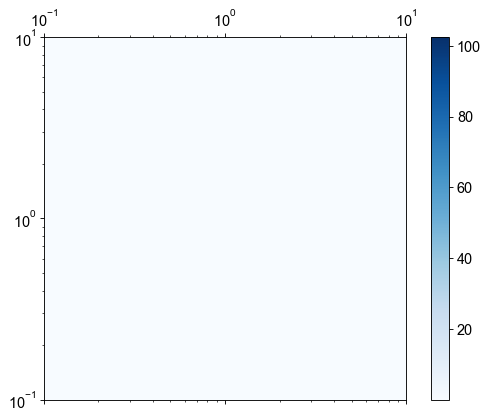

In [24]:
print((1500/1000)**(-7/3)*0.1)

0.03882579843272439


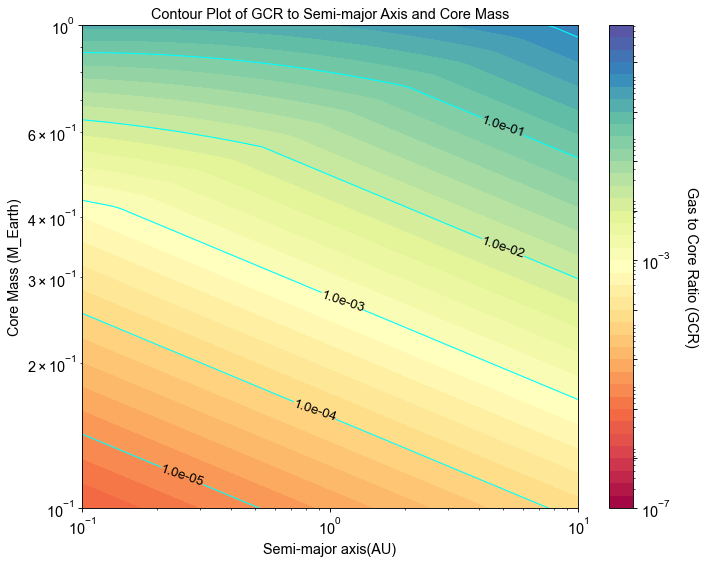

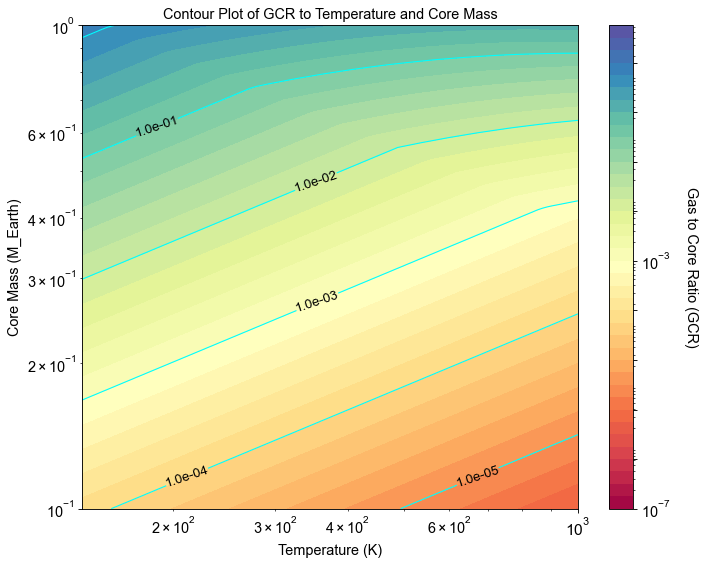

In [11]:

from scipy import integrate
import scipy.integrate as integrate
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker, cm, colors

SMALL_SIZE = 13
matplotlib.rc('font',size = SMALL_SIZE, family = 'Arial')
matplotlib.rc('axes',titlesize = SMALL_SIZE)

hfont = {'fontname':'Helvetica'}

M_Earth = 5.972e+27
mu = 2.34
m_p = 1.67*10**(-24) #[g]
k_B = 1.38*10**(-16)#[erg/K]
G = 6.67408 * 10**(-8) #[dyne cm^2/g^2]
M_mars = 0.64171*10**(27) #[g]
M_sun = 1.989*10**(33) #[g]
M_earth = 5.98*10**27 #[g]
R_E = 6.378*10**8 #[cm]
autocm = 1.496*10**(13)
Ne_reserve = 64.5e15
S_Ne = 2.7e-12
x_Ne = 2.1e-5

T_0 = 1000

#define temperature
def T_disk(a):
    return T_0*(a/0.1)**(-3/7) #[K]

def Cs_disk(T):
    return np.sqrt(k_B*T/mu/m_p) #CHECK UNITS [cm/s]

def M_int(x, a, M, P_bot,T): 
    #print(Cs_disk(T))
    #compute the R_out based on Boundy/Hill Radisu
    R_H = a*(M/3/M_sun)**(1/3)*autocm #cm
    R_B = G*M/Cs_disk(T)**2 #cm
    

    R_out = [0]
    R_out = min(R_H,R_B)
    R_out_E = R_out/R_E
    
    A = G*M/Cs_disk(T)**2 #CHECK UNITS [cm]

    #P_bot = 10**6#Ne_reserve/S_Ne/x_Ne/M
    R_bot = R_E*M**0.25
    exp = np.exp(-A/R_out + A/R_bot)
    rho_bot = P_bot/Cs_disk(T)**2 #[g/cm^3]
    rho_ne = rho_bot/exp
    
    return 4*np.pi*rho_ne*(x**2*np.exp(A/R_bot - A/x))

M_array = np.linspace(1e-1, 10,5000)
M_P_Constant = [0]*len(M_array)
M_P_Ne_limit = [0]*len(M_array)
M_P_10bar = [0]*len(M_array)
M_P_5bar = [0]*len(M_array)

def r_max(M, T):
    return G*M*M_Earth/Cs_disk(T)**2



def GCR_isothermal(a, M):
    T = T_disk(a) 
    r_min = R_E*(M)**0.25
    #P_Ne = Ne_reserve/S_Ne/x_Ne/M/M_Earth
    P_Ne = 0.12171882539682544*1e5
    res = quad(M_int, r_min, r_max(M,T), args=(a ,M*M_Earth, P_Ne,T))[0]
    return res/M/M_Earth



N = 100
sma = np.logspace(-1,1, N)
M_co = np.logspace(-1, 0, N)
Z = np.zeros((N,N))


X, Y = np.meshgrid(M_co, sma)
for i in range(len(M_co)):
    for j in range(len(sma)):
        Z[i][j] = GCR_isothermal(M_co[i],sma[j])

fig, ax = plt.subplots(figsize = (10, 8), dpi = 80)

max_GCR = 1
min_GCR = -7

origin = 'lower'
lev_exp = np.arange(min_GCR, max_GCR, 0.2)
levs = np.power(10, lev_exp)
#print(lev_exp)
cs = ax.contourf(Y, X, Z, levs, norm=colors.LogNorm(),cmap='Spectral')
#cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
ax.set_xlabel('Semi-major axis(AU)')
ax.set_ylabel('Core Mass (M_Earth)')
ax.set_yscale('log')
ax.set_xscale('log')
ee = np.arange(min_GCR,max_GCR,1)
levss = np.power(10., ee)

CS4 = ax.contour(Y, X, Z, levss,
                  colors=('cyan',),
                  linewidths=(1,),
                  origin=origin)
ax.set_title('Contour Plot of GCR to Semi-major Axis and Core Mass')
ax.clabel(CS4, fmt='%1.1e', colors='black', fontsize=12)

cbar = fig.colorbar(cs)
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel('Gas to Core Ratio (GCR)', rotation=270)
plt.savefig("GCR for sma and M",dpi=300, bbox_inches='tight')
plt.show()

# plotting T, M against GCR

N = 100
sma_T = np.logspace(-1,1, N)
M_co = np.logspace(-1, 0, N)
Z_T = np.zeros((N,N))

for i in range(len(M_co)):
    for j in range(len(sma_T)):
        Z_T[i][j] = GCR_isothermal(M_co[i],sma_T[j])

X_T, Y_T = np.meshgrid(M_co, T_disk(sma_T))

fig, ax = plt.subplots(figsize = (10, 8), dpi = 80)

origin = 'lower'

lev_exp = np.arange(min_GCR, max_GCR, 0.2)
levs = np.power(10, lev_exp)
#print(lev_exp)
cs = ax.contourf(Y_T, X_T, Z_T, levs, norm=colors.LogNorm(),cmap='Spectral')
#cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Core Mass (M_Earth)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(axis = 'x', labelsize = 14)
ee = np.arange(min_GCR,max_GCR,1) #[-9, -5, -4, -3, -2, -1.5, -1,0.,0.5, 1, 5, 7, 9]
levss = np.power(10., ee)

CS4 = ax.contour(Y_T, X_T, Z_T, levss,
                  colors=('cyan',),
                  linewidths=(1,),
                  origin=origin)
ax.set_title('Contour Plot of GCR to Temperature and Core Mass')
ax.clabel(CS4, fmt='%1.1e', colors='black', fontsize=12)

cbar = fig.colorbar(cs)
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel('Gas to Core Ratio (GCR)', rotation=270)
plt.savefig("GCR for T and M",dpi=300, bbox_inches='tight')
plt.show()








[4.93070710e-08 5.10576380e-08 5.28703560e-08 5.47474317e-08
 5.66911498e-08 5.87038765e-08 6.07880617e-08 6.29462425e-08
 6.51810460e-08 6.74951926e-08 6.98914992e-08 7.23728827e-08
 7.49423637e-08 7.76030699e-08 8.03582401e-08 8.32112281e-08
 8.61655069e-08 8.92246724e-08 9.23924487e-08 9.56726917e-08
 9.90693943e-08 1.02586691e-07 1.06228864e-07 1.10000346e-07
 1.13905729e-07 1.17949766e-07 1.22137380e-07 1.26473668e-07
 1.30963909e-07 1.35613569e-07 1.40428307e-07 1.45413984e-07
 1.50576670e-07 1.55922649e-07 1.61458428e-07 1.67190746e-07
 1.73126580e-07 1.79273157e-07 1.85637957e-07 1.92228730e-07
 1.99053497e-07 2.06120566e-07 2.13438540e-07 2.21016326e-07
 2.28863150e-07 2.36988562e-07 2.45402454e-07 2.54115067e-07
 2.63137008e-07 2.72479257e-07 2.82153188e-07 2.92170576e-07
 3.02543616e-07 3.13284932e-07 3.24407602e-07 3.35925164e-07
 3.47851638e-07 3.60201543e-07 3.72989910e-07 3.86232307e-07
 3.99944855e-07 4.14144243e-07 4.28847758e-07 4.44073297e-07
 4.59839394e-07 4.761652

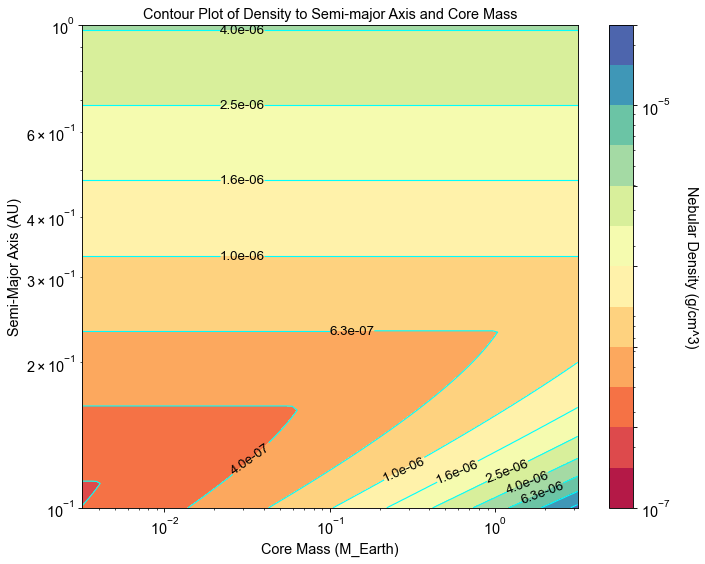

In [13]:
## plotting T-M against density of nebular
def rho_nebular(M, a):
    T = T_disk(a)
 
    P_bot = 0.12171882539682544*1e5   
    R_H = a*(M/3/M_sun)**(1/3)*autocm #cm
    R_B = G*M/Cs_disk(T)**2 #cm
    

    R_out = [0]
    R_out = min(R_H,R_B)
    R_out_E = R_out/R_E
    
    #print(R_out)
    
    A = G*M/Cs_disk(T)**2 #CHECK UNITS [cm]

    #P_bot = 10**6#Ne_reserve/S_Ne/x_Ne/M
    R_bot = R_E*M**0.25
    exp = np.exp(-A/R_out + A/R_bot)
    rho_bot = P_bot/Cs_disk(T)**2 #[g/cm^3]
    rho_ne = rho_bot/exp
    return rho_ne

def sig_ne(a):
    K = np.sqrt(G*M_sun/(a*autocm)**3)
    H = Cs_disk(a)/K
    mini_sig = 1.7*10**3*(a*autocm)**(-3/2)
    return H*mini_sig



N = 100
sma_T = np.logspace(-2.5,0.5, N)
M_co = np.logspace(-1, 0, N)*M_Earth
Z_rho = np.zeros((N,N))

#rho_mini = [0]*len(sma_T)
rho_mini = sig_ne(sma_T)
print(rho_mini)

#print(Cs_disk(T_disk(sma_T)))

for i in range(len(M_co)):
    for j in range(len(sma_T)):
        Z_rho[i][j] = rho_nebular(M_co[i],sma_T[j])
        
#print(Z_rho)

X_rho, Y_rho = np.meshgrid(M_co/M_Earth, sma_T)

fig, ax = plt.subplots(figsize = (10, 8), dpi = 80)

origin = 'lower'

min_rho = -7
max_rho = -4.5

lev_exp = np.arange(min_rho, max_rho, 0.2)
levs = np.power(10, lev_exp)
#print(lev_exp)
cs = ax.contourf(Y_rho, X_rho, Z_rho, levs, norm=colors.LogNorm(),cmap='Spectral')
#cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
ax.set_ylabel('Semi-Major Axis (AU)')
ax.set_xlabel('Core Mass (M_Earth)')
ax.set_yscale('log')
ax.set_xscale('log')
ee = np.arange(min_rho,max_rho,0.2) #[-9, -5, -4, -3, -2, -1.5, -1,0.,0.5, 1, 5, 7, 9]
levss = np.power(10., ee)

CS4 = ax.contour(Y_rho, X_rho, Z_rho, levss,
                  colors=('cyan',),
                  linewidths=(1,),
                  origin=origin)
ax.set_title('Contour Plot of Density to Semi-major Axis and Core Mass')
ax.clabel(CS4, fmt='%1.1e', colors='black', fontsize=12)

ax.plot()

cbar = fig.colorbar(cs)
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel('Nebular Density (g/cm^3)', rotation=270)
plt.savefig("Density for a and M",dpi=300, bbox_inches='tight')
plt.show()